Lectura del dataset

In [57]:
import pandas as pd

df = pd.read_excel('iMDb (dataset).xlsx')

df.head()

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
0,Pirates of the Caribbean: At World's End,2007,"Adventure, Fantasy, Action",169,United States of America,300000000,961000000,31363664.0,6.9
1,Superman Returns,2006,"Adventure, Fantasy, Action, Science Fiction",154,United States of America,270000000,391081192,13284712.0,5.4
2,Spider-Man 3,2007,"Fantasy, Action, Adventure",139,United States of America,258000000,890871626,27614265.0,5.9
3,Harry Potter and the Half-Blood Prince,2009,"Adventure, Fantasy, Family",153,"United Kingdom, United States of America",250000000,933959197,19083723.0,7.4
4,Avatar,2009,"Action, Adventure, Fantasy, Science Fiction",162,"United States of America, United Kingdom",237000000,2787965087,185070892.0,7.2


# a)
 Representad de forma geográfica (que incluya también una representación cuantitativa por presupuestos) los países productores de las películas.

### Preprocesado
Asignaremos a todos los paises participantes en la producción de una película el presupuesto de la misma. Para ello dejarremos la columna Production Countries con un solo país, replicando las filas donde existan más de una valor en este campo.

In [3]:
countries_split = df.copy()
countries_split['Production Countries'] = countries_split['Production Countries'].str.split(', ')
countries_split = countries_split.explode('Production Countries')
pd.unique(countries_split['Production Countries'])

array(['United States of America', 'United Kingdom', 'Czech Republic',
       'Poland', 'Slovenia', 'Canada', 'New Zealand', 'Germany', 'Italy',
       'Malta', 'France', 'Netherlands', 'Australia', 'China', 'Japan',
       'Uruguay', 'Paraguay', 'Spain', 'Morocco', 'Ireland',
       'South Africa', 'Hungary', 'Switzerland', 'Hong Kong', 'Russia',
       'Romania', 'Pakistan', 'Mexico', 'Denmark', 'Iceland',
       'South Korea', 'Tunisia', 'Belgium', 'India', 'Costa Rica', 'Peru',
       'Brazil', 'Luxembourg', 'Qatar', 'United Arab Emirates',
       'Portugal', 'Liechtenstein'], dtype=object)

In [33]:
countries = (countries_split.groupby(by='Production Countries')
                    .agg({'Title':'count', 'Budget': 'sum'})
                    .sort_values(by='Title',ascending=False)
                    .reset_index()
                    .rename(columns={'Title':'Number of Films','Budget':'Total Budget',"Production Countries":"Production Country"})
)
countries.head(10)

,Production Country,Number of Films,Total Budget
0,United States of America,1003,70662737652
1,United Kingdom,140,11323630000
2,Germany,124,9188633049
3,France,58,3253366397
4,Canada,38,2602800000
5,Australia,32,2421500000
6,Italy,20,1583496397
7,Czech Republic,15,1356000000
8,Japan,14,966677699
9,New Zealand,10,968000000


### Visualización

In [39]:
import plotly.express as px

fig = px.choropleth(countries,locationmode="country names",locations="Production Country",
                    color="Total Budget", 
                    hover_name="Production Country", 
                    color_continuous_scale=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#08589e']
                    )

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="White",
)
fig.show()

# b)
 Evaluad de forma interactiva y dinámica cómo ha sido la evolución cuantitativa de los 
géneros  Drama,  Aventura,  Comedia  y  Acción  durante  el  periodo  1995-2005.  Utilizad 
para ello, por ejemplo, la herramienta Flourish (https://flourish.studio).

Preprocesado

Filtramos por los años deseados

In [52]:
pd.unique(df["Year"].sort_values())

array([1927, 1962, 1976, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2011], dtype=int64)

In [72]:
genres = df.copy()
genres = genres.query("Year > 1994" or "Year < 2006")
pd.unique(genres["Year"].sort_values())

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2011], dtype=int64)

Multiplicamos las fials para que solo exista un género en cada una.

In [73]:
genres['Genres'] = genres['Genres'].str.split(', ')
genres = genres.explode('Genres')
pd.unique(genres['Genres'])

array(['Adventure', 'Fantasy', 'Action', 'Science Fiction', 'Family',
       'Thriller', 'Drama', 'Romance', 'Crime', 'Animation', 'War',
       'Comedy', 'Western', 'Horror', 'History', 'Mystery', 'Music',
       'Documentary'], dtype=object)

Filtramos para quedarnos solo con drama, comedia, aventura y acción.

In [74]:
genres = genres[(genres.Genres == 'Drama') | (genres.Genres == 'Adventure') | (genres.Genres == 'Action')| (genres.Genres == 'Comedy')]
pd.unique(genres['Genres'])

array(['Adventure', 'Action', 'Drama', 'Comedy'], dtype=object)

Contamos el número de peliculas por genero y año

In [78]:
genresGrouped = (genres.groupby(by=['Genres','Year'])
                    .agg({'Title':'count'})
                    .sort_values(by='Year',ascending=True)
                    .reset_index()
                    .rename(columns={'Title':'Number of Films'})
)
genresGrouped.head(10)

,Genres,Year,Number of Films
0,Action,1995,18
1,Drama,1995,15
2,Comedy,1995,3
3,Adventure,1995,10
4,Action,1996,16
5,Drama,1996,24
6,Adventure,1996,12
7,Comedy,1996,11
8,Action,1997,24
9,Drama,1997,19


Pruebas


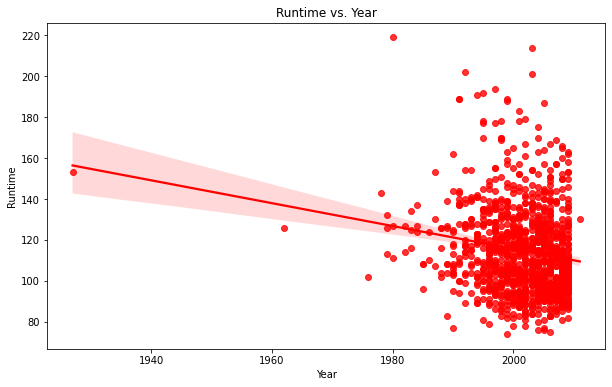

In [30]:
def runtime_year_plot(df):
    """
    This function plots the runtime vs. year of the movies.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Plot the runtime vs. year
    plt.figure(figsize=(10,6))
    sns.regplot(x="Year", y="Runtime (Minutes)", data=df, color="red")
    plt.title("Runtime vs. Year")
    plt.xlabel("Year")
    plt.ylabel("Runtime")
    plt.show()
runtime_year_plot(films)



TypeError: can't multiply sequence by non-int of type 'float'

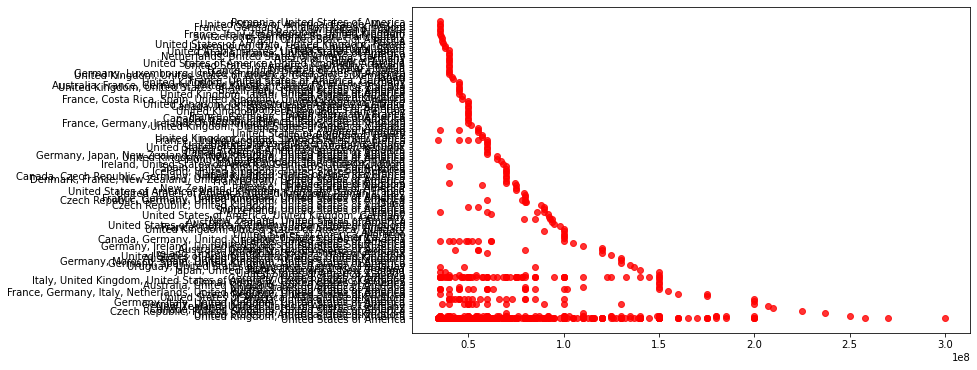

In [7]:
def paises_presupuestos(df):
    '''
    Representa de forma geográfica (incluye también una representación
    cuantitativa por presupuestos) los países productores de las películas.
    '''


Identificad cuál ha sido la película más taquillera y cuál fue la décima que más
    recaudó.

In [28]:
def show_top_n_films_by_revenue(films,n):
    '''
    Muestra los titulos de n películas con mayor recaudación.
    '''
    films_top_revenue = films.sort_values(by='Revenue', ascending=False)
    print(films_top_revenue[['Title','Revenue']].head(n))
show_top_n_films_by_revenue(films,10)

                                             Title     Revenue
4                                           Avatar  2787965087
8                                          Titanic  1845034188
178  The Lord of the Rings: The Return of the King  1118888979
11      Pirates of the Caribbean: Dead Man's Chest  1065659812
16                                 The Dark Knight  1004558444
99        Harry Potter and the Philosopher's Stone   976475550
0         Pirates of the Caribbean: At World's End   961000000
177                                   Finding Nemo   940335536
49       Harry Potter and the Order of the Phoenix   938212738
3           Harry Potter and the Half-Blood Prince   933959197


c:\Users\LuisG\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


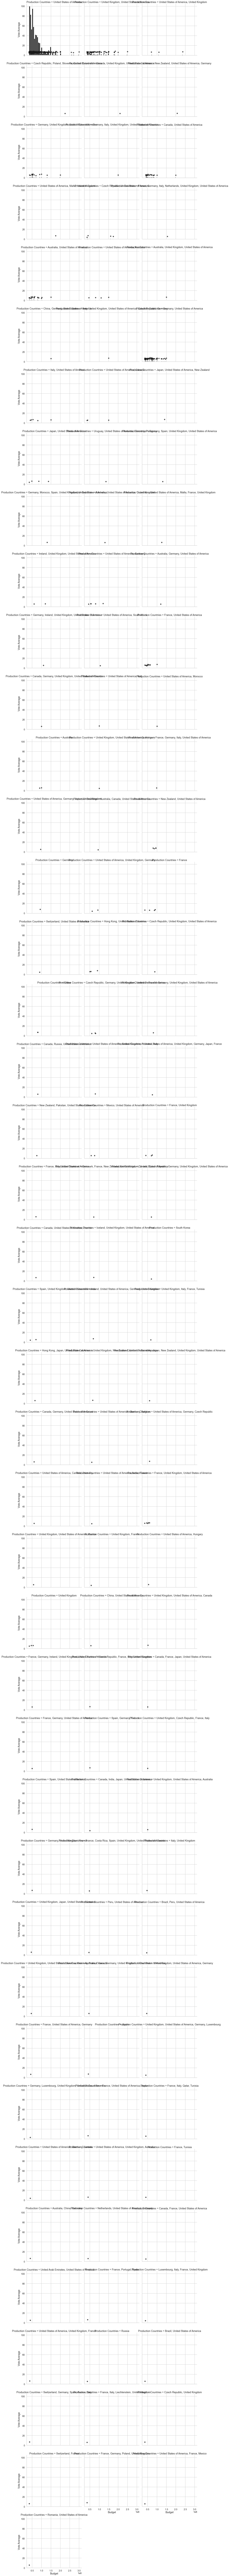

In [31]:
def plot_countries_by_budget(films):
    '''
    Representa de forma geográfica (incluye también una representación
    cuantitativa por presupuestos) los países productores de las películas.
    '''